# TASK 1 - Prediction using Supervised ML

To Predict the percentage of marks of the students based on the number of hours they studied

## Auther: Ahmed Mohamed Zaki


In [1]:
# importing the required libraries

# Work with Arrays and linear algebra
import numpy as np
# Data processing
import pandas as pd
# Data visualizations 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Reading the Data 
data = pd.read_csv ('data.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# Checking if there are duplicated rows.
print('{} of data is duplicated rows'.format(
    str(round(data.duplicated().sum() / data.size * 100,5))+'%'))

0.0% of data is duplicated rows


In [4]:
# Checking  if there are Nulvalues.
print('{} of data is NuLL'.format(
    str(round(data.isna().sum().sum() / data.size * 100,3))+'%'))

0.0% of data is NuLL


### Visualize our Data and Plot a Regression line to gey the correlation beyween 'Marks Percentage' and 'Hours Studied'

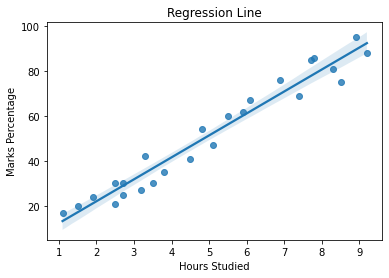

In [5]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Line')
plt.ylabel('Marks Percentage')
plt.xlabel('Hours Studied')
plt.show()

#### There are positive correlation.

## Training the Model

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### 1) Splitting the Data

In [7]:
# Defining X and y from the Data
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

# Spliting the Data in two
X_train,X_test,y_train,y_test= train_test_split(X, y, random_state = 0)

print("x_train shape is:",X_train.shape)
print("x_test shape is:",X_test.shape)
print("y_train shape is:",y_train.shape)
print("y_test shape is:",y_test.shape)

x_train shape is: (18, 1)
x_test shape is: (7, 1)
y_train shape is: (18,)
y_test shape is: (7,)


### 2) Fitting the Data into the model

In [8]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

## Predicting the Percentage of Marks

In [9]:
pred_y = regression.predict(X_test)
prediction = pd.DataFrame({'Hours': [i[0] for i in X_test], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


## Comparing the Predicted Marks with the Actual Marks

In [10]:
compare_scores = pd.DataFrame({'Actual Marks': y_test, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


## Comparing the Predicted Marks with the Actual Marks

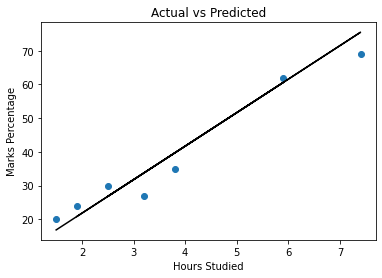

In [11]:
plt.scatter(X_test,y_test)
plt.plot(X_test, pred_y, color='Black')
plt.title('Actual vs Predicted')
plt.ylabel('Marks Percentage')
plt.xlabel('Hours Studied')
plt.show()

## Evaluating the Model

In [12]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(y_true=y_test,y_pred=pred_y)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=pred_y) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=pred_y,squared=False)

print("Mean absolute error:",mae)
print("Mean squared error:",mse)
print("Root Mean squared error:",rmse)


Mean absolute error: 4.130879918502486
Mean squared error: 20.33292367497997
Root Mean squared error: 4.5092043283688055


Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very low.

## What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [13]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


**According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks.**